In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import re
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from tensorflow import keras
from transformers import AutoTokenizer, TFAutoModel
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TFAutoModelForSequenceClassification
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split

2023-06-13 11:58:35.673886: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-13 11:58:54.587668: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-13 11:59:26.415583: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/reza/Documents/pascasarjana/tugaskk/env/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [18]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/reza/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/reza/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/reza/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Preprocessing Data

In [27]:
# Word normalization
lexicon_df = pd.read_csv("datasets/colloquial-indonesian-lexicon.csv", sep=',', header=None)
lexicon = dict(zip(lexicon_df[0], lexicon_df[1]))

lexicon

{'slang': 'formal',
 'woww': 'wow',
 'aminn': 'amin',
 'met': 'selamat',
 'netaas': 'menetas',
 'keberpa': 'keberapa',
 'eeeehhhh': 'eh',
 'kata2nyaaa': 'kata-katanya',
 'hallo': 'halo',
 'kaka': 'kakak',
 'ka': 'kak',
 'daah': 'dah',
 'aaaaahhhh': 'ah',
 'yaa': 'ya',
 'smga': 'semoga',
 'slalu': 'selalu',
 'amiin': 'amin',
 'kk': 'kakak',
 'trus': 'terus',
 'sii': 'sih',
 'nyenengin': 'menyenangkan',
 'bgt': 'banget',
 'gemess': 'gemas',
 'akuuu': 'aku',
 'jgn': 'jangan',
 'udah': 'sudah',
 'gitu': 'begitu',
 'aja': 'saja',
 'gemesiin': 'menggemaskan',
 'menyenangkn': 'menyenangkan',
 'rb': 'ribu',
 'akau': 'aku',
 'saranin': 'menyarankan',
 'nemuin': 'menemukan',
 'yah': 'ya',
 'mnis2nya': 'manis-manisnya',
 'gtu': 'begitu',
 'tu': 'itu',
 'idolaa': 'idola',
 'bangett': 'banget',
 'kaakk': 'kak',
 'baaiikkk': 'baik',
 'telaatt': 'telat',
 'kaak': 'kak',
 'yg': 'yang',
 'lg': 'lagi',
 'skarang': 'sekarang',
 'sempet': 'sempat',
 'karna': 'karena',
 'ngga': 'enggak',
 'mantep': 'mantap

In [34]:
# Data preprocessing
def normalize_word(word, lexicon):
    if word in lexicon:
        return lexicon[word]
    else:
        return word

def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z]', ' ', text)

    # Tokenize the text
    tokens = word_tokenize(text.lower())

    # Remove stopwords
    stop_words = set(stopwords.words('indonesian'))
    tokens = [normalize_word(token, lexicon) for token in tokens if token not in stop_words]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join the tokens back into a single string
    processed_text = ' '.join(tokens)

    return processed_text

In [3]:
df = pd.read_csv("datasets/reviews.csv")

df.head(5)

,reviews,label
0,kemeja nya bagusss bgtttt😍😍😍aaaa mauuu nngisss...,1.0
1,"Jahitannya sih rapi,cuman ada benang yang ikut...",0.0
2,Sesuai harga. Agak tipis tapi masih oke kok. W...,0.0
3,"Wah gila sihhh sebagus itu, se worth it, se l...",1.0
4,Kain nya bagus halus \nTapi kok di bukak koto...,0.0


In [4]:
df['label'].shape

(831,)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(df['reviews'], df['label'], random_state=0)

In [37]:
text = [preprocess_text(x) for x in X_train]
text

['bagus banget bubble wrap tebal juga pembelian langsung enggak mengecewakan makasihh',
 'jam nya eror',
 'pengiriman flas sale kaca nya noda enggak hilang',
 'nya cantik bajunya sudah kali order foto order baju yang',
 'kecewa sudah ukuran xl tapi tetap saja kasih yang',
 'kykny yang salah deh yang enggak sesuai nih pesan warna dark grey loh dark jean pengin banget warna dark grey ya enggak apa-apa seller nya pesanan kali kalo memang enggak ada warna chat ya min biarpun pembeli enggak nyantumin warna cdangan',
 'senang sih belanja lengkap barang datang datengnya cepat banget barang nya worth itu banget sih harga enggak mahal kualitas enggak kecewa pokoknya beli thank you',
 'bahan ok boleh tapi maaf ya min sayang yang robek quality control nya enggak kayanya kalo sampai sobek begini bintang lagi tokonya',
 'belanja saj belanja barang yang dikirim jujur kadangana vidio unboxing karena toko jujur pikir toko jujur jujur barang yang dikirimnya jera akan order ketoko',
 'kondisi ta kecewa 

In [38]:
tokenizer = AutoTokenizer.from_pretrained("indolem/indobert-base-uncased")
indobert = TFAutoModel.from_pretrained("indolem/indobert-base-uncased", from_pt=True)

2023-06-10 17:13:57.899081: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2023-06-10 17:14:24.273884: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 98067456 exceeds 10% of free system memory.
2023-06-10 17:14:24.789101: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 98067456 exceeds 10% of free system memory.
2023-06-10 17:14:24.919614: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 98067456 exceeds 10% of free system memory.
2023-06-10 17:14:31.479630: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 98067456 exceeds 10% of free system memory.
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.decoder.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.tr

In [42]:
max_length = 128
tokenized_texts = tokenizer(
    X_train.tolist(),
    truncation=True,
    padding="max_length",
    max_length=max_length,
    return_tensors="tf",
)

# Convert labels to numerical values
labels = tf.convert_to_tensor(y_train)

tokenized_texts

{'input_ids': <tf.Tensor: shape=(623, 128), dtype=int32, numpy=
array([[    3,  4839,   944, ...,     0,     0,     0],
       [    3,  2418,  2647, ...,     0,     0,     0],
       [    3,  8841,  2461, ...,     0,     0,     0],
       ...,
       [    3,  4579, 19345, ...,     0,     0,     0],
       [    3,  3889,  6639, ...,     0,     0,     0],
       [    3, 11450,  9988, ...,     0,     0,     0]], dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(623, 128), dtype=int32, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(623, 128), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32

In [45]:
input_ids = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int32)
attention_mask = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int32)

# Pass the inputs through the IndoBERT model
embedding = indobert(input_ids, attention_mask=attention_mask)[0]

# Use the pooled output for classification
pooled_output = tf.keras.layers.GlobalAveragePooling1D()(embedding)

# Add a dense layer for classification
output = tf.keras.layers.Dense(1, activation="sigmoid")(pooled_output)

# Create the model
model = tf.keras.models.Model(inputs=[input_ids, attention_mask], outputs=output)

In [46]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=["accuracy"])

In [47]:
model.fit(
    x=(tokenized_texts["input_ids"], tokenized_texts["attention_mask"]),
    y=labels,
    batch_size=16,
    epochs=10,
)

Epoch 1/10


2023-06-10 17:17:20.335100: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 98067456 exceeds 10% of free system memory.


39/39 [==============================] - 1606s 40s/step - loss: 0.6412 - accuracy: 0.6421
Epoch 2/10
39/39 [==============================] - 1794s 46s/step - loss: 0.3081 - accuracy: 0.8812
Epoch 3/10
39/39 [==============================] - 1724s 44s/step - loss: 0.1579 - accuracy: 0.9358
Epoch 4/10
39/39 [==============================] - 1610s 41s/step - loss: 0.0725 - accuracy: 0.9759
Epoch 5/10
39/39 [==============================] - 1569s 40s/step - loss: 0.0319 - accuracy: 0.9904
Epoch 6/10
39/39 [==============================] - 1410s 36s/step - loss: 0.0390 - accuracy: 0.9904
Epoch 7/10
39/39 [==============================] - 1342s 34s/step - loss: 0.1008 - accuracy: 0.9599
Epoch 8/10
39/39 [==============================] - 1356s 35s/step - loss: 0.0271 - accuracy: 0.9888
Epoch 9/10
39/39 [==============================] - 1341s 34s/step - loss: 0.0439 - accuracy: 0.9839
Epoch 10/10
39/39 [==============================] - 1444s 37s/step - loss: 0.0148 - accuracy: 0.9952


In [56]:
val_text = [preprocess_text(x) for x in X_test]
val_text

['jelek banget gambar mah bagus',
 'langganan banget enggak pernah kecewa sekali yaampun recomended banget',
 'sayang banget yang maroon tombolnya patah enggak tau patahannya kmna yaudah enggak apa-apa bintang tapi karena cacat saja ya',
 'mantappppppppp enggak kecewa pokoknya rekomendasi pokoknya mantulll',
 'kecewa sih karena pesan warna fuschia datengnya pink mohon teliti kak',
 'aga kecewa noda sudah order yang ke kali nya',
 'kecewa saya pesan ukuran sama dtengin xl',
 'kali pembelian yang benar size warna nya order kali salah warna size benar orderan benar orderan ketiga warnanya benar sizenya kegedean',
 'banget untung beli karetnya enggak elastis huhu sayang banget padahal bb ku kg juga cuma',
 'alhamdulillah paketnya bahannya tipi sesuai harganya',
 'jamnya rusak',
 'maaf ya kasih bintang pketnya baru sampai mingguan padahal pket ku plng pesan ta yang wrna hitam yang modelnya nya nya warnanya beda sampai barangnya penyok semua karena pengemasannya yang plastik doang perbaiki p

In [57]:
tokenized_val_texts = tokenizer(
    val_text,
    truncation=True,
    padding="max_length",
    max_length=max_length,
    return_tensors="tf",
)

tokenized_val_texts

{'input_ids': <tf.Tensor: shape=(208, 128), dtype=int32, numpy=
array([[    3, 13290, 10218, ...,     0,     0,     0],
       [    3, 19996, 10218, ...,     0,     0,     0],
       [    3,  5458, 10218, ...,     0,     0,     0],
       ...,
       [    3,  4346, 23675, ...,     0,     0,     0],
       [    3,  3888,  1497, ...,     0,     0,     0],
       [    3,  5695,  5197, ...,     0,     0,     0]], dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(208, 128), dtype=int32, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(208, 128), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32

In [58]:
val_labels = tf.convert_to_tensor(y_test)

val_labels

<tf.Tensor: shape=(208,), dtype=float64, numpy=
array([0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0.,
       1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1.,
       0., 1., 0., 0.])>

In [70]:
prediction = model.predict(
    x={"input_3": tokenized_val_texts["input_ids"], "input_4": tokenized_val_texts["attention_mask"]},
    batch_size=2
)

104/104 [==============================] - 185s 2s/step


In [77]:
pred_label = []
for pred in prediction:
    predicted_label = 1 if pred[0] >= 0.5 else 0
    pred_label.append(predicted_label)
    
pred_label

[1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0]

In [71]:
model.evaluate(
    x={"input_3": tokenized_val_texts["input_ids"], "input_4": tokenized_val_texts["attention_mask"]},
    y=val_labels,
    batch_size=2
)

104/104 [==============================] - 191s 2s/step - loss: 0.6539 - accuracy: 0.8846


[0.6538886427879333, 0.8846153616905212]

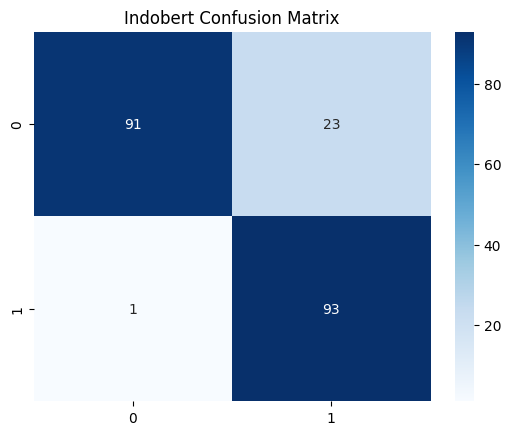

In [79]:
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, pred_label)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Indobert Confusion Matrix')
plt.show()

In [81]:
print('Accuracy:', accuracy_score(y_test, pred_label))
print('F1 score:', f1_score(y_test, pred_label, average='weighted'))
print('Precision:', precision_score(y_test, pred_label, average='weighted'))
print('Recall:', recall_score(y_test, pred_label, average='weighted'))

Accuracy: 0.8846153846153846
F1 score: 0.8844980262455991
Precision: 0.9044372044746858
Recall: 0.8846153846153846
